# Doctor's Consultation Fee Dataset

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee?



# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Loading Dataset

In [3]:
dftrain=pd.read_excel("C:/Users/stead/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Train.xlsx")
dftrain.head()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
dftest=pd.read_excel("C:/Users/stead/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx")
dftest.head()


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


Data Set we have
Size of training set: 5961 records

Size of test set: 1987 records

Features:
Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located

In [5]:
dftrain.shape

(5961, 7)

we have 5961 rows and 7 columns

In [6]:
dftest.shape

(1987, 6)

we have 1987 rows and 6 columns fees column is missing here as we have to determine it.

In [7]:
for i in dftrain.columns:
    print(dftrain[i].value_counts())
    print('\n')

BDS                                                                            488
BHMS                                                                           477
BAMS                                                                           471
MBBS                                                                           334
MBBS, MS - ENT                                                                 220
                                                                              ... 
MBBS, MS - General Surgery, DNB - Urology/Genito - Urinary Surgery               1
MBBS, MS - ENT, DNB - ENT, FCPS - General Surgery, DORL (ENT)                    1
BHMS, BSc - Zoology                                                              1
BDS, MBA (Health Care), Diploma in Health Administration                         1
BDS, MDS, PGDMLS, Post Graduate Diploma in Hospital & Healthcare Management      1
Name: Qualification, Length: 1420, dtype: int64


9 years experience     323
10 years e

In [8]:
for i in dftest.columns:
    print(dftest[i].value_counts())
    print('\n')

BAMS                                                                                                                   153
BHMS                                                                                                                   150
BDS                                                                                                                    144
MBBS                                                                                                                   107
MBBS, MD - Dermatology                                                                                                  64
                                                                                                                      ... 
BAMS, Doctor of Medicine                                                                                                 1
BDS, Diploma in Health Administration                                                                                    1
MBBS, MS - Otorh

Many values in columns are repetative or obsolete so we can either rename them or drop the unnecessary values in dataset.


In [9]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


All the columns Datatypes are object except for Fees columns which is int64 and many missing values in our columns which needsto be imputed

# Data Cleaning and Preprocessing

We are going to concatenate the dataset for cleaning so that we do not have to perform the same operation on test and train dataset twice. Post data cleaning we will again separate the data and do the analysis

In [10]:
doctorfee=dftrain.append(dftest, sort="False")

In [11]:
doctorfee.shape

(7948, 7)

Now,we have 7984 rows and 7 columns in our new concatenated dataset.

In [12]:
doctorfee['Area']=doctorfee.Place.str.split(',').str[0]
doctorfee['City']=doctorfee.Place.str.split(',').str[1]

splitted the Place into two different columns i.e. Area and City


In [13]:
doctorfee.Area.fillna("others",inplace=True)
doctorfee.City.fillna("others",inplace=True)

Replaced the null values in the Area and City columns with 'others'.

In [15]:
doctorfee['qual1']=doctorfee.Qualification.str.split(',').str[0]
doctorfee['qual2']=doctorfee.Qualification.str.split(',').str[1]
doctorfee['qual3']=doctorfee.Qualification.str.split(',').str[2]

splitted the qualification into different columns for making it easier for analysis


In [16]:
doctorfee.qual1.fillna("XXX",inplace=True)
doctorfee.qual2.fillna("XXX",inplace=True)
doctorfee.qual3.fillna("XXX",inplace=True)

replced the null values in qual1, qual2, qual3 coulumns

In [17]:
doctorfee['exp_years']=doctorfee.Experience.str.split(' ').str[0].astype(int)

splitted the Experience column in to int value of experience


In [19]:
doctorfee.Rating.fillna('0%',inplace=True)
doctorfee['Ratings']=doctorfee.Rating.str.split("%").str[0]
doctorfee['Ratings']=doctorfee['Ratings'].astype(int)

Replaced the Null values in ratings columns with 0%

In [20]:
doctorfee['Misc1']=doctorfee.Miscellaneous_Info.str.split('%').str[0]
doctorfee['Misc1_len']=doctorfee.Misc1.str.len()
doctorfee.loc[doctorfee.Misc1_len >3,['Misc1']]=0
doctorfee.Misc1.fillna(0,inplace=True)
doctorfee.Misc1=doctorfee.Misc1.astype(int)
doctorfee['Misc2']=doctorfee.Miscellaneous_Info.str.split('% ').str[1]
doctorfee['Misc3']=doctorfee.Misc2.str.split(' ').str[0]
doctorfee['Misc3_len']=doctorfee.Misc3.str.len()
doctorfee.loc[doctorfee.Misc3_len >3,['Misc3']]=0
doctorfee.Misc3.fillna(0,inplace=True)
doctorfee.loc[doctorfee.Misc3 == ',',['Misc3']]=0
doctorfee.Misc3=doctorfee.Misc3.astype(int)

splitted the Miscellaneous columns into different columns to analysis

In [21]:
doctorfee.loc[(doctorfee['Ratings'] > 0) & (doctorfee.Misc3 == 0),['Misc3']]=1

In [22]:
doctorfee.columns

Index(['Experience', 'Fees', 'Miscellaneous_Info', 'Place', 'Profile',
       'Qualification', 'Rating', 'Area', 'City', 'qual1', 'qual2', 'qual3',
       'exp_years', 'Ratings', 'Misc1', 'Misc1_len', 'Misc2', 'Misc3',
       'Misc3_len'],
      dtype='object')

The features which are required for our analysis are these so we will drop some we don't need.


In [23]:
doctorfee= doctorfee.drop(doctorfee[['Experience','Misc1','Misc2','Miscellaneous_Info','Place','Qualification','Rating','Misc1_len','Misc3_len']], axis=1)

In [24]:
doctorfee=doctorfee.sort_values(by='Fees',ascending=False).reset_index(drop=True)

sort the column by fees in ascending order in order to see the fees easily

In [25]:
doctorfee.isnull().sum()

Fees         1987
Profile         0
Area            0
City            0
qual1           0
qual2           0
qual3           0
exp_years       0
Ratings         0
Misc3           0
dtype: int64

1987 null values in fees column because of test data otherwise there are no null values and below heatmap is to present that.

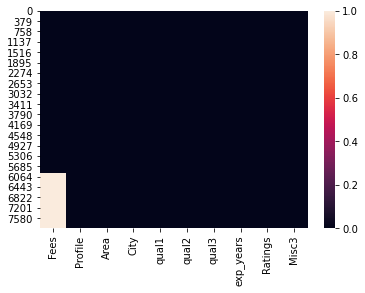

In [26]:
sns.heatmap(doctorfee.isnull())
plt.show()

In [27]:
doctorfee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fees       5961 non-null   float64
 1   Profile    7948 non-null   object 
 2   Area       7948 non-null   object 
 3   City       7948 non-null   object 
 4   qual1      7948 non-null   object 
 5   qual2      7948 non-null   object 
 6   qual3      7948 non-null   object 
 7   exp_years  7948 non-null   int32  
 8   Ratings    7948 non-null   int32  
 9   Misc3      7948 non-null   int32  
dtypes: float64(1), int32(3), object(6)
memory usage: 527.9+ KB


Observation:
1.We have 7948 rows and 10 columns in our concatanated dataset

2.After data preprocessing and cleaning we have three dtypes in our data object ,flaot and int

3.we have successfully imputed all the missing values and except the fees column where we have to predict those values

In [28]:
doctorfee.Fees.value_counts().reset_index().sort_values(by='index')

,index,Fees
27,5.0,1
25,10.0,2
28,20.0,1
20,30.0,4
23,40.0,2
11,50.0,81
19,60.0,11
16,70.0,18
18,80.0,12
0,100.0,1306


Fee distribution-: minimum fees is 5Rs and maximum fees is 950 Rs

In [31]:
doctorfee[doctorfee.Fees < 50]

,Fees,Profile,Area,City,qual1,qual2,qual3,exp_years,Ratings,Misc3
5951,40.0,Ayurveda,Bandra East,Mumbai,BAMS,XXX,XXX,37,0,0
5952,40.0,Homeopath,Kandivali West,Mumbai,BHMS,Certificate in Child Health (CCH),CGO,22,0,0
5953,30.0,Ayurveda,Marathahalli,Bangalore,MD - Ayurveda Medicine,XXX,XXX,35,0,0
5954,30.0,Ayurveda,Goregaon East,Mumbai,BAMS,XXX,XXX,9,0,0
5955,30.0,Ayurveda,Secunderabad,Hyderabad,BAMS,XXX,XXX,15,0,0
5956,30.0,Ayurveda,Bhandup West,Mumbai,BAMS,XXX,XXX,45,0,0
5957,20.0,General Medicine,Secunderabad,Hyderabad,MBBS,MD - General Medicine,XXX,44,0,0
5958,10.0,Ayurveda,Worli,Mumbai,BAMS,XXX,XXX,4,0,0
5959,10.0,Dentist,Perumbavoor,Ernakulam,BDS,XXX,XXX,3,0,0
5960,5.0,Dentist,TV Medical College,Thiruvananthapuram,BDS,XXX,XXX,6,0,0


The years of experience is much greater than 10 or 20 but the Fees is less than 50. However there are some of the records which have 1 years of experience and even then the fees is more than 50. We cannot deny the fact that different qualification and profile required different fees. So we can say that either they have data migration error or they are charity cases.

# Exploratory Data Analysis

# statistical summary

In [32]:
doctorfee.describe()

,Fees,exp_years,Ratings,Misc3
count,5961.000000,7948.000000,7948.000000,7948.000000
mean,307.944640,17.446653,42.321465,10.324987
std,190.920373,11.201217,47.324081,39.854939
min,5.000000,0.000000,0.000000,0.000000
25%,150.000000,9.000000,0.000000,0.000000
50%,300.000000,15.000000,0.000000,0.000000
75%,500.000000,23.000000,96.000000,1.000000
max,950.000000,66.000000,100.000000,854.000000


Observation-:
1.Mean is greater than 50% in all the columns which indicates our data is positively skewed.
2.Standard Deviation for Fees column is very high which means the data is spread through out.
3.After observing the 75% and 100% percentile we can clearly say that there are outliers in our dataset.
4.Minimum Fees is 5Rs. which is not practically possible so it mean that there is a typo error or data migration error or may be a case of charity

In [33]:
doctorfee.corr() #check the correlation

,Fees,exp_years,Ratings,Misc3
Fees,1.000000,0.002117,0.153273,0.089585
exp_years,0.002117,1.000000,-0.033530,0.011948
Ratings,0.153273,-0.033530,1.000000,0.293172
Misc3,0.089585,0.011948,0.293172,1.000000


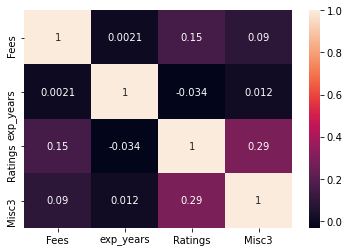

In [35]:
sns.heatmap(doctorfee.corr(),annot=True) #plotting heat map for the correlation matrix

Observations:
1.Most of our columns are catagorical variables so we do not have many correlations between features

2.Fees, Misc3, ratings have some positive correlation

3.Exp_year and  Rating have  low negative correlation with each other.

Text(0.5, 1.0, 'Correlation with the target variable')

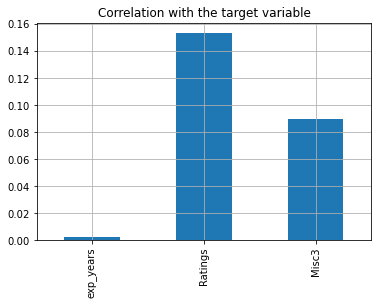

In [36]:
doctorfee.drop('Fees',axis=1).corrwith(doctorfee['Fees']).plot(kind='bar',grid=True) #plottingthe correlation with our target variable
plt.title("Correlation with the target variable")

# Univariate EDA Analysis

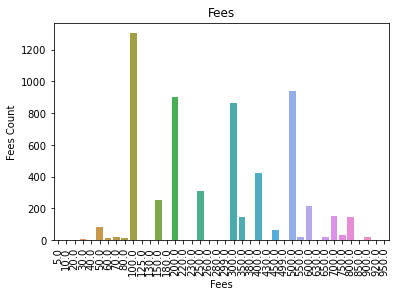

100.0    1306
500.0     938
200.0     904
300.0     864
400.0     424
250.0     307
150.0     253
600.0     215
700.0     153
350.0     143
800.0     143
50.0       81
450.0      65
750.0      34
550.0      22
650.0      21
70.0       18
900.0      18
80.0       12
60.0       11
30.0        4
380.0       2
130.0       2
40.0        2
180.0       2
10.0        2
260.0       2
5.0         1
20.0        1
499.0       1
299.0       1
230.0       1
850.0       1
430.0       1
220.0       1
630.0       1
950.0       1
280.0       1
125.0       1
920.0       1
Name: Fees, dtype: int64


In [38]:
sns.countplot(x='Fees',data=doctorfee)
plt.title("Fees")
plt.xlabel("Fees")
plt.ylabel("Fees Count")
plt.xticks(rotation=90)
plt.show()
print(doctorfee['Fees'].value_counts())

100 Rs is the most common doctor consulation fees, followed by 200, 500, 300 and so on in our dataset

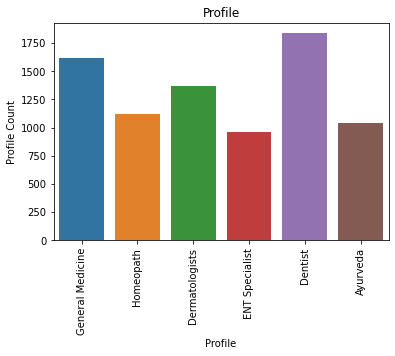

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64


In [39]:
sns.countplot(x='Profile',data=doctorfee)
plt.title("Profile")
plt.xlabel("Profile")
plt.ylabel("Profile Count")
plt.xticks(rotation=90)
plt.show()
print(doctorfee['Profile'].value_counts())

Dentist are the most visited doctor and ENT specialist are least visisted

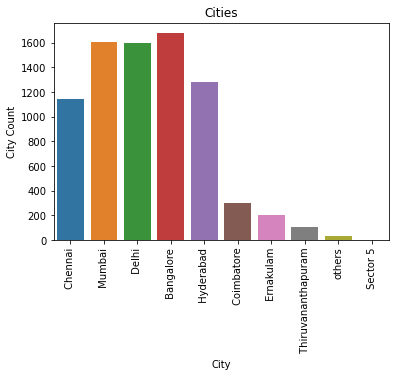

 Bangalore             1678
 Mumbai                1608
 Delhi                 1601
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
others                   32
 Sector 5                 1
Name: City, dtype: int64


In [40]:
sns.countplot(x='City',data=doctorfee)
plt.title("Cities")
plt.xlabel("City")
plt.ylabel("City Count")
plt.xticks(rotation=90)
plt.show()
print(doctorfee['City'].value_counts())

Most of the doctors are from Merto cities

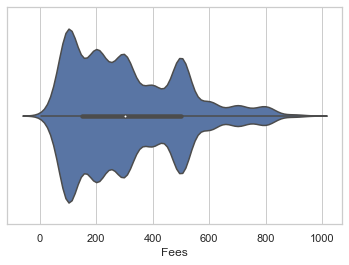

In [42]:
sns.set(style='whitegrid')
sns.violinplot(doctorfee['Fees'])
plt.show()

Median of fees is around 300 and tip od the plot indicates that there are outliers.

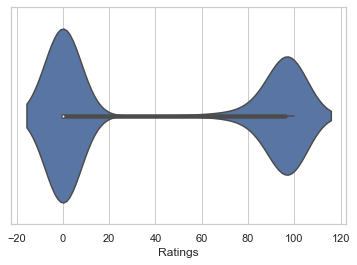

In [43]:
sns.set(style='whitegrid')
sns.violinplot(doctorfee['Ratings'])
plt.show()

There are hardly any ratings from 20 to 80 most ratings are 0to 10 and 90 to 100.

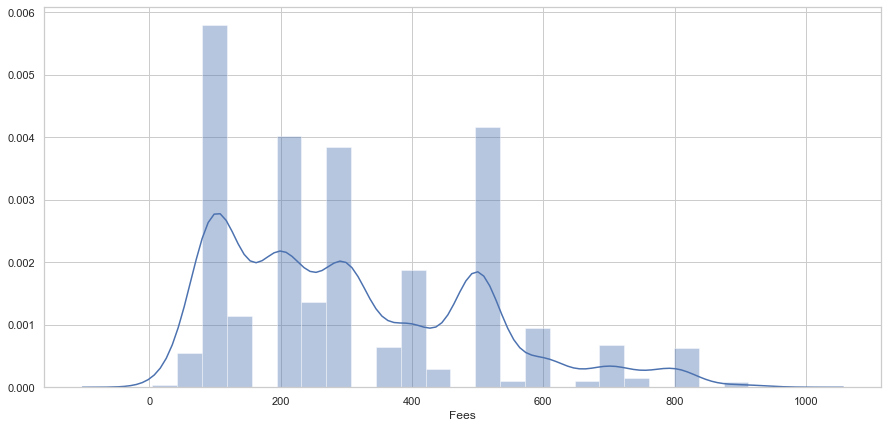

In [45]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(doctorfee['Fees'].sort_values(), ax=ax)
plt.show()

mode of consultation fees is Rs 100 then Rs 500

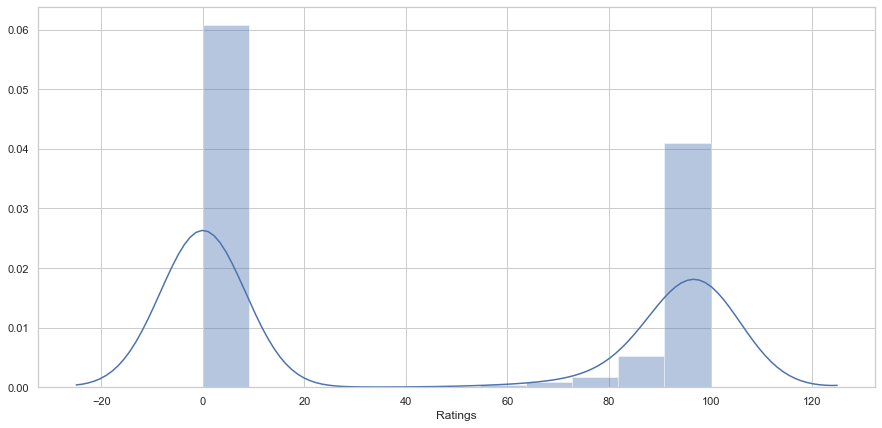

In [46]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(doctorfee['Ratings'].sort_values(), ax=ax)
plt.show()

 mode of rating is 0 to 10 and followed by 90 to 100

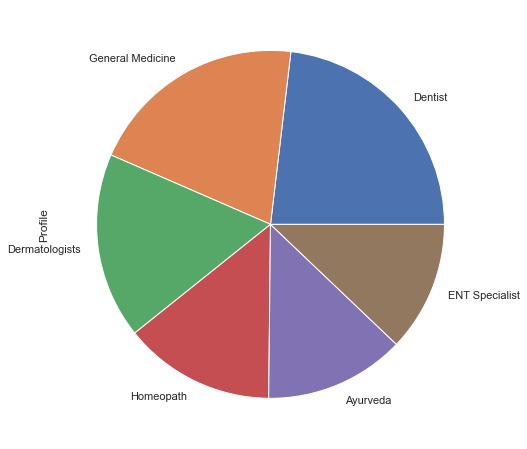

In [47]:
doctorfee['Profile'].value_counts().plot.pie(figsize = (8,8))

The distribution of doctors speciality seen in the above graph.

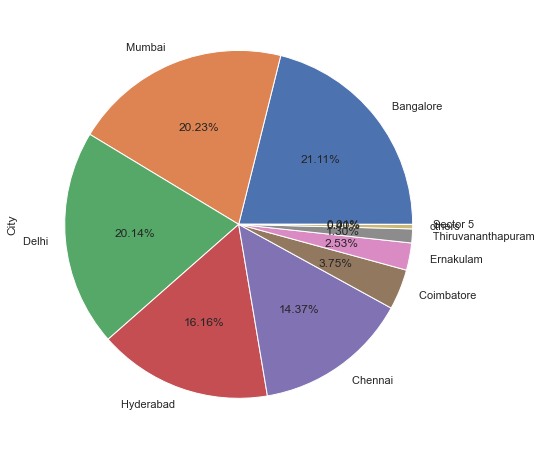

In [48]:
doctorfee['City'].value_counts().plot.pie(figsize = (8,8), autopct = '%.2f%%')

The distribution of doctors speciality availability seen in the above graph.

# Bivariant Analysis

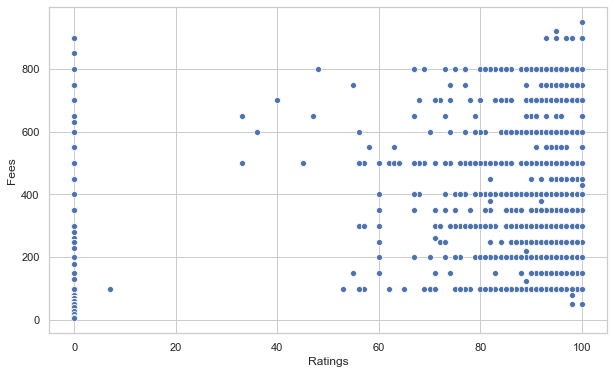

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Fees',x='Ratings',data=doctorfee)
plt.show()

That maximum mode of rating is 0 and fees is 100

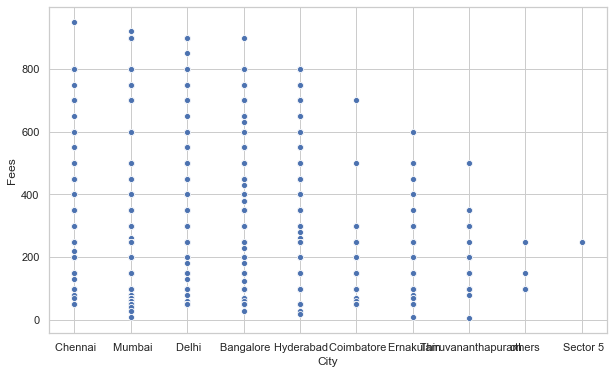

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='Fees',x='City',data=doctorfee)
plt.show()

In chennai the consulation fees is highest, followed by Mumbai, delhi and banglore

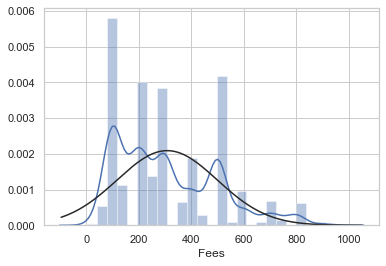

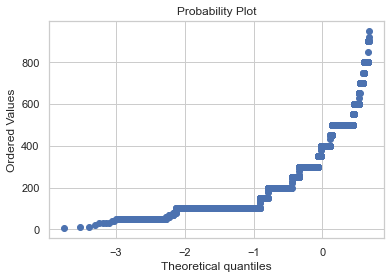

In [51]:
from scipy import stats
from scipy.stats import norm
sns.distplot(doctorfee['Fees'], fit = norm)
fig= plt.figure()
res = stats.probplot(doctorfee['Fees'], plot = plt)

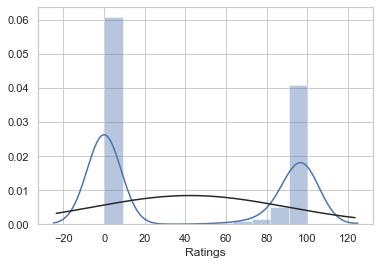

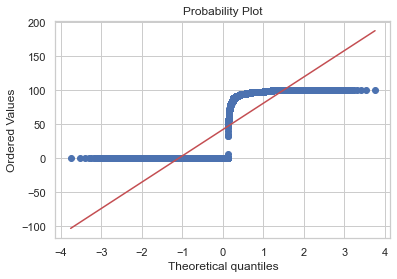

In [53]:
sns.distplot(doctorfee['Ratings'], fit = norm)
fig= plt.figure()
res = stats.probplot(doctorfee['Ratings'], plot = plt)

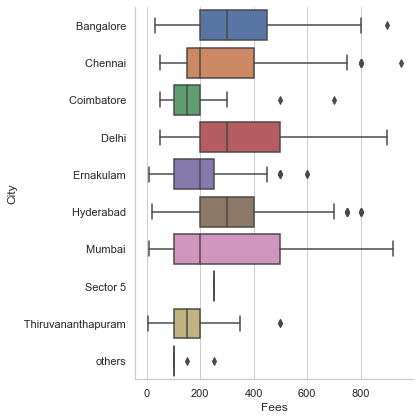

In [54]:
sns.catplot(x='Fees', y='City', data=doctorfee.sort_values("City"), kind='box', height=6, aspect= 1)
plt.show()


The median for all the city varies and there are outliers present. Mumbai, Delhi, Chennai datas are positively skewed where as Ernakulam data is negatively skewed

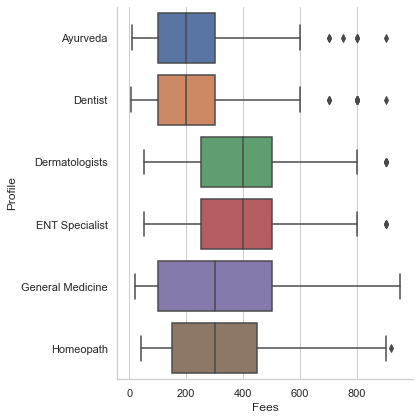

In [55]:
sns.catplot(x='Fees', y='Profile', data=doctorfee.sort_values("Profile"), kind='box', height=6, aspect= 1)
plt.show()


There are outliers and most of the data normally distributed. Dermatologist and ENT specialist data is slightly negatively skewed

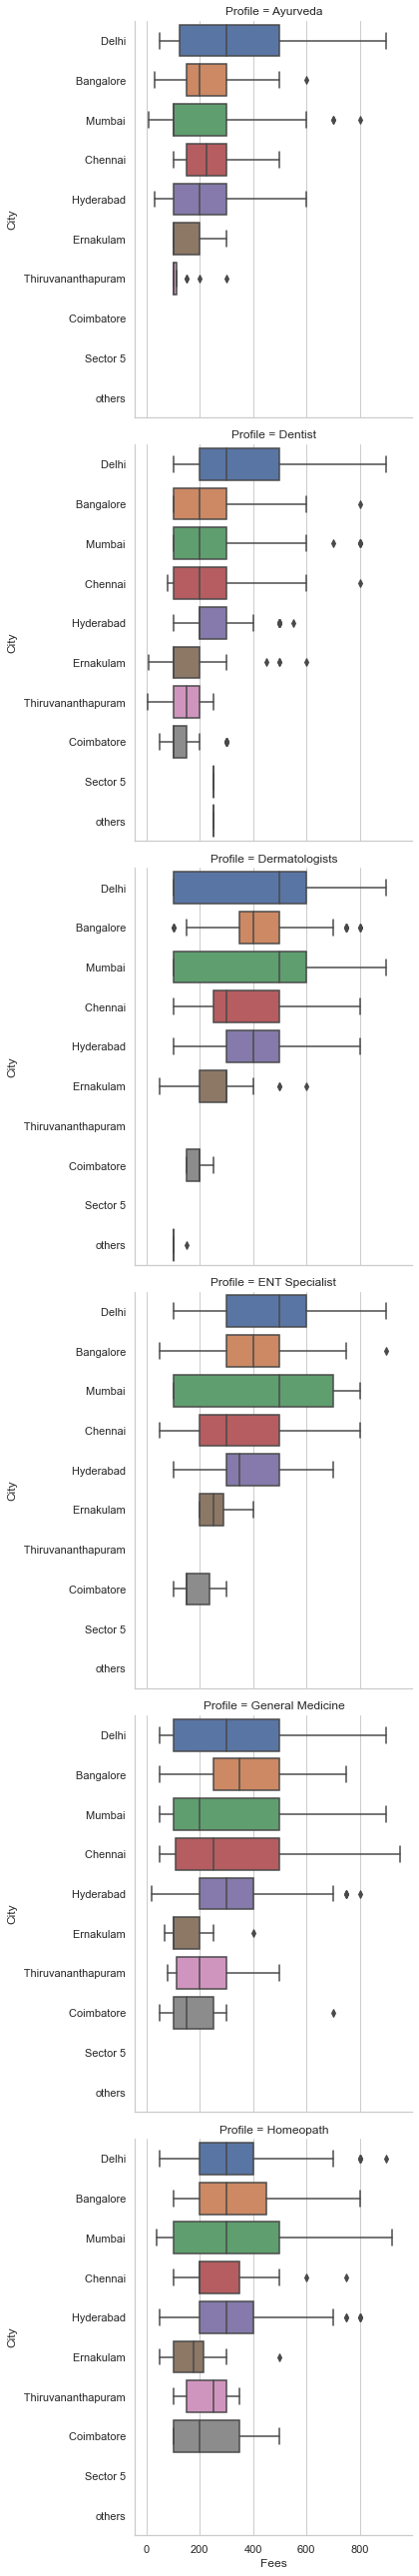

In [56]:
sns.catplot(x='Fees', y='City', row='Profile', data=doctorfee.sort_values("Profile"), kind='box', height=6, aspect= 1)
plt.show()

Observation:
1The most of the doctor are from metro cities
2Aurveda and Dentist speciality is mostly evenly distribited in all the cities
3Dermatologist and ENT are negatively skewed in the the metro cities
4General medicine is positively skewed in Mumbai and chennai

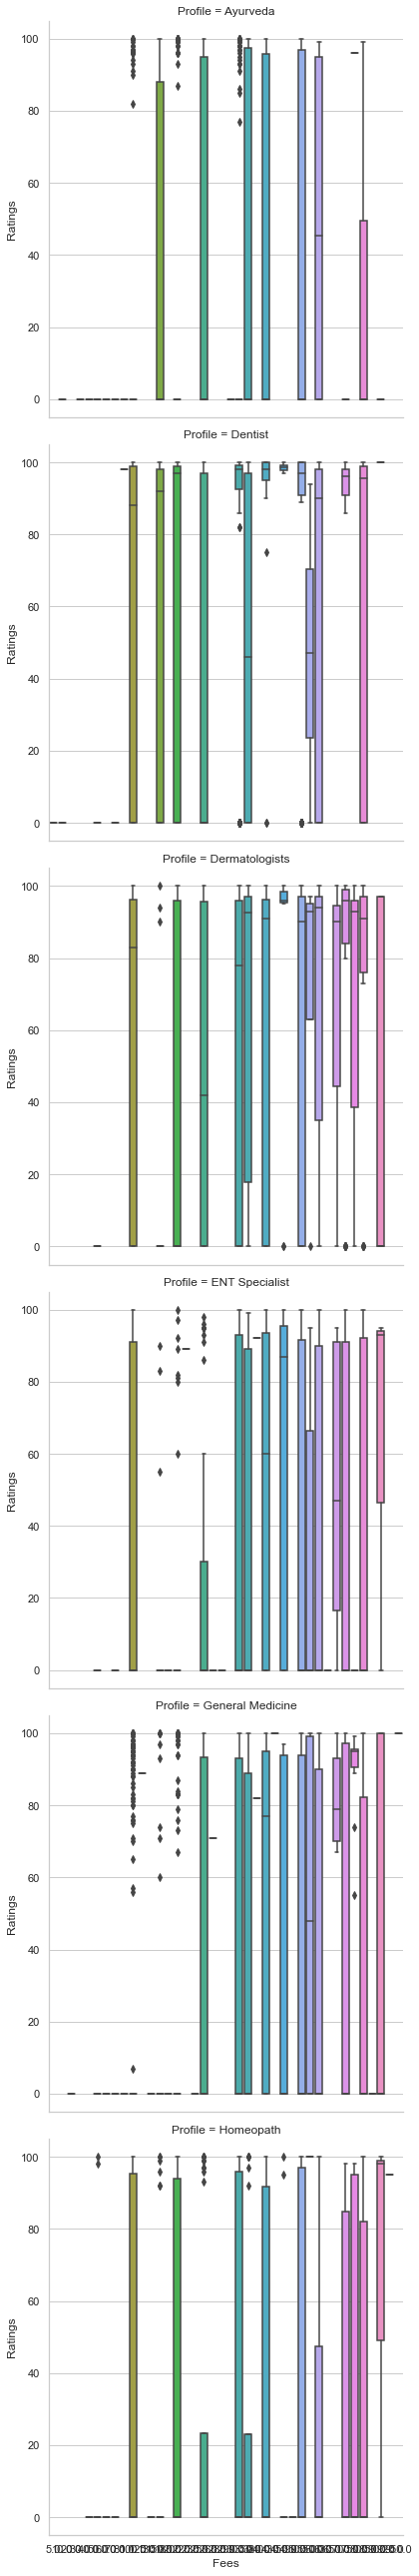

In [58]:
sns.catplot(x='Fees', y='Ratings', row='Profile', data=doctorfee.sort_values("Profile"), kind='box', height=6, aspect=1)
plt.show()

There are not any certain pattern which can correlate the ratings and fees of doctors. It is may be because we have huge number of outliers in the rating columns also we filled nan values with 0

# Multivariant Analysis

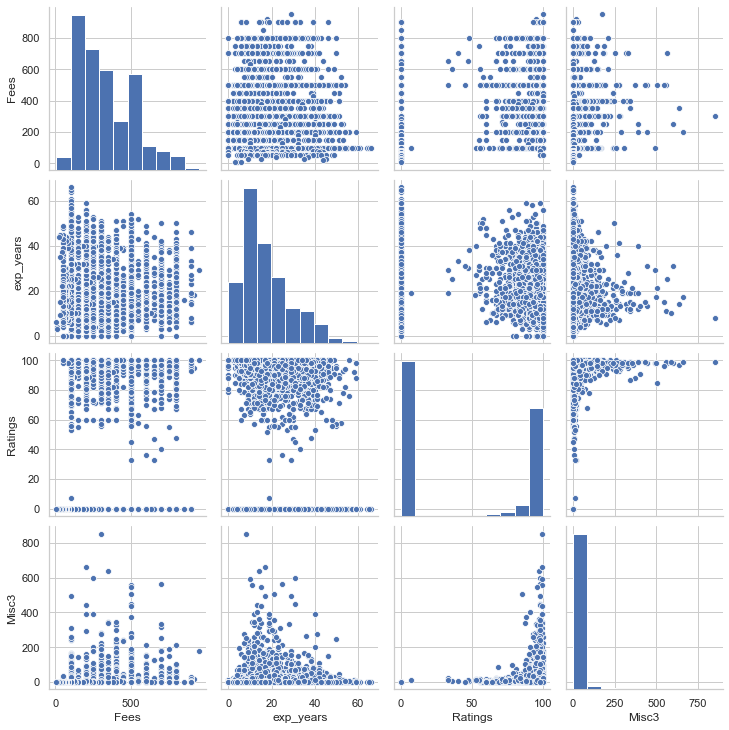

In [59]:
sns.pairplot(doctorfee)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B17A3615B0>,
      dtype=object)

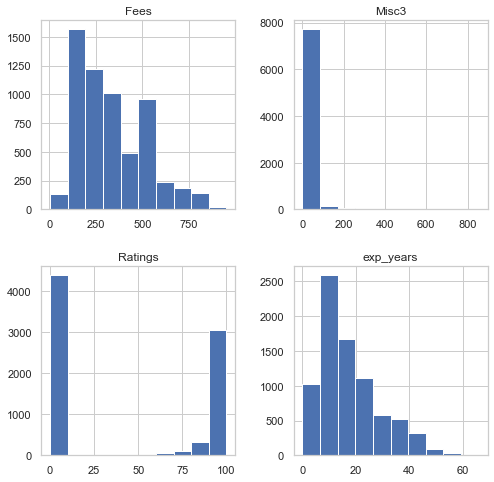

In [60]:
doctorfee.hist(figsize=(8,8))

# Plotting Outliers

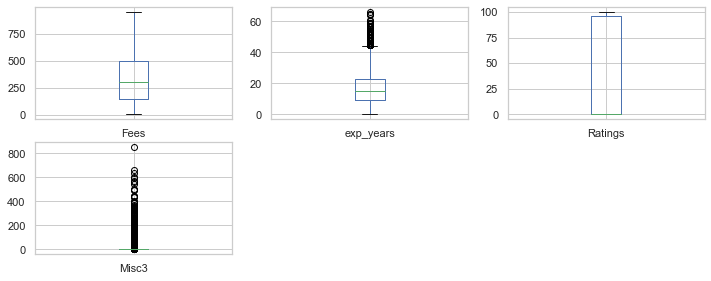

In [61]:
doctorfee.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

outliers in the Misc3 and Exp_years

In [62]:
from sklearn.preprocessing import LabelEncoder
cat_cols=['Profile','Area','City','qual1','qual2','qual3']
for i in cat_cols:
    le=LabelEncoder()
    doctorfee[i]=le.fit_transform(doctorfee[i])
doctorfee.head()

,Fees,Profile,Area,City,qual1,qual2,qual3,exp_years,Ratings,Misc3
0,950.0,4,8,1,101,296,218,29,100,175
1,920.0,5,154,6,113,13,481,18,95,17
2,900.0,4,189,3,101,378,481,31,0,0
3,900.0,2,660,6,38,112,309,23,0,0
4,900.0,2,878,3,101,84,77,15,97,1


# Treating Outliers

In [63]:
#from scipy.stats import zscore
#z_score=abs(zscore(doctorfee))
#print(doctorfee.shape)
#doctorfee_final=doctorfee.loc[(z_score<3).all(axis=1)]
#print(doctorfee_final.shape)

Removing the outlier is removing more data which is impacting our analysis. So, decided not to remove the outliers.

In [66]:
doctorfee.skew() #skewness of our DataSet

Fees         0.751870
Profile      0.088789
Area         0.100890
City         0.075867
qual1       -0.000762
qual2       -0.580769
qual3       -2.200929
exp_years    0.984224
Ratings      0.241674
Misc3        8.433681
dtype: float64

# Treating the skewness

In [65]:
#for col in doctorfee.columns:
 #   if doctorfee[col].skew()>0.55:
  #      doctorfee[col]=np.log1p(doctorfee[col])

#recheck the skewness of our DataSet
#doctorfee.skew()

Removing the skewness from our dataset  has effected our result so,decided not to treat the skewness.

# Model Prepration for Machine Learning

In [67]:
traindf= doctorfee[0:5961]
testdf = doctorfee[5961:]
testdf = testdf.drop(['Fees'], axis =1)

#splitting the data into dependent and independent variables

In [68]:
docfee = traindf[['qual1','qual2','exp_years', 'Ratings','Profile','Area','City','Misc3','Fees']]
X = docfee.drop(['Fees'], axis=1)
y = docfee.Fees

In [69]:
X.shape

(5961, 8)

In [70]:
y.shape

(5961,)

In [71]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [72]:
maX_r2_score=0
for r_state in range(42,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30,random_state=r_state)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>maX_r2_score:
        maX_r2_score = r2_scr
        final_r_state = r_state
    
print(" random state of maX_r2_score",final_r_state,"is",maX_r2_score)

 random state of maX_r2_score 189 is 0.12425970496370808


 maximum R2 score at random state 189.As most of our data is catagorical and we do not have float datatypes in our target variable.we are getting very low R2 score only 12%.

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=189)

In [75]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNN = KNeighborsRegressor()
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()


In [76]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNN))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=189, shuffle=True)

In [78]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
RMAE = []

for name,model in models:
    
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre = model.predict(X_test)
    
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    
    sc = cross_val_score(model,X,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error: {}".format(mse))
    MSE.append(mse)
    
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error: {}".format(mae))
    MAE.append(mae)
    
    rmae = np.sqrt(mean_absolute_error(y_test,pre))
    print("Root Mean absolute error: {}".format(rmae))
    RMAE.append(rmae)
    
    print("\n")

LinearRegression()
R2 Score =  0.12425970496370808
Cross val score =  0.09759123143997366
Mean Squared error: 32239.044929779884
Mean absolute error: 145.51538904454438
Root Mean absolute error: 12.062975961368089


Ridge()
R2 Score =  0.12425938422231464
Cross val score =  0.09759126607113267
Mean Squared error: 32239.05673738569
Mean absolute error: 145.51546735143674
Root Mean absolute error: 12.062979207121131


Lasso()
R2 Score =  0.12409328850735146
Cross val score =  0.09757460749869351
Mean Squared error: 32245.17129811527
Mean absolute error: 145.5604192415296
Root Mean absolute error: 12.064842280010525


KNeighborsRegressor()
R2 Score =  0.0015213749177266367
Cross val score =  0.014512345258501624
Mean Squared error: 36757.46958077138
Mean absolute error: 149.4460592509782
Root Mean absolute error: 12.224813260372455


SVR()
R2 Score =  0.007214710536781577
Cross val score =  0.0069583970116560145
Mean Squared error: 36547.878102723174
Mean absolute error: 148.6686866762735

In [79]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE, "Root Mean Absolute Error": RMAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error,Root Mean Absolute Error
0,LinearRegression,0.124260,0.097591,32239.044930,145.515389,12.062976
1,Ridge,0.124259,0.097591,32239.056737,145.515467,12.062979
2,Lasso,0.124093,0.097575,32245.171298,145.560419,12.064842
3,KNeighborsRegressor,0.001521,0.014512,36757.469581,149.446059,12.224813
4,SVR,0.007215,0.006958,36547.878103,148.668687,12.192977
5,DecisionTreeRegressor,-0.527712,-0.555714,56240.371716,172.294578,13.126103
6,RandomForestRegressor,0.214253,0.185574,28926.085091,131.555202,11.469752
7,AdaBoostRegressor,0.120646,0.107733,32372.095564,149.041322,12.208248
8,GradientBoostingRegressor,0.223311,0.213961,28592.620960,132.771157,11.522637


In pivot table we can observe that we are not getting  good score from any of the regression model.So, hyper tune our model and check the score again.

In [80]:
GBC = GradientBoostingRegressor(random_state=189)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(GBC.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 189,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [81]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'max_depth':[3,5,8],
    'n_estimators':[100,200,500,1000],
             }
grid = GridSearchCV(estimator=GBC,param_grid=parameters,cv=2,
                    n_jobs=5,verbose=True)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   32.7s
[Parallel(n_jobs=5)]: Done 168 out of 168 | elapsed:  2.4min finished


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=189),
             n_jobs=5,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=True)
0.19280919822840342
100
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


# Retraining model

In [82]:
GBC = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 3, n_estimators = 200)
GBC.fit(X_train,y_train)
print("Score=",GBC.score(X_train,y_train))
predgbc = GBC.predict(X_test)
print("\n")
print('Mean Absolute Error= ', mean_absolute_error(y_test,predgbc))
print('Mean squared Error= ', mean_squared_error(y_test,predgbc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predgbc)))
print("\n")
print('R2 Score=',r2_score(y_test,predgbc))

Score= 0.28390517260242354


Mean Absolute Error=  132.70381899899616
Mean squared Error=  28528.696963023438
Root Mean Absolute Error=  11.519714362734701


R2 Score= 0.22504746806810283


In [83]:
predgbc

array([430.70645899, 422.4653956 , 386.07094343, ..., 349.5025905 ,
       446.84745112, 466.50409616])

Model is predicting the results. checking in test dataset and see how our model is predicting the result on that.

In [86]:
doctorfeetest = pd.read_excel("C:/Users/stead/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx")
doctorID = doctorfeetest[['Profile']]
doctorfeetest = pd.concat([doctorID, pd.DataFrame(predgbc).rename(columns = {0 : 'Fees'})], axis=1)

doctorfeetest

,Profile,Fees
0,General Medicine,430.706459
1,ENT Specialist,422.465396
2,Dermatologists,386.070943
3,Ayurveda,305.118143
4,Dentist,235.686277
...,...,...
1982,Ayurveda,NaN
1983,Dermatologists,NaN
1984,General Medicine,NaN
1985,Dentist,NaN


Model is not performing well as there are still null values so,our model is not predicting in the test dataset.

In [87]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, n_estimators = 100)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[01:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [90]:
R2 = r2_score(y_test,preds)
sc = cross_val_score(xg_reg,X,y,cv=kf,scoring="r2").mean()
rmse = np.sqrt(mean_squared_error(y_test, preds))
print('\n')
print("R2 Score:",R2)
print("Cross val score:",sc)
print("Root Mean absolute error: %f" % (rmse))
test_xgb = testdf[['qual1','qual2','exp_years', 'Ratings','Profile','Area','City','Misc3']]
preds_xgb = xg_reg.predict(test_xgb)
test_xgb['Fees'] = preds_xgb

[01:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:59:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[01:59:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


R2 Score: 0.21398619581024714
Cross val score: 0.2179762049705704
Root Mean absolute error: 173.812509


In [91]:
preds_xgb

array([272.68283, 339.61295, 364.71463, ..., 299.95834, 207.39716,
       330.58963], dtype=float32)

In [93]:
doctorfeetest = pd.read_excel("C:/Users/stead/Downloads/Doctor_fee_consultation/Final Participant Data Folder/Final_Test.xlsx")

doctorID = doctorfeetest[['Profile']]

doctorfeetest = pd.concat([doctorID, pd.DataFrame(preds_xgb).rename(columns = {0 : 'Fees'})], axis=1)

doctorfeetest

,Profile,Fees
0,General Medicine,272.682831
1,ENT Specialist,339.612946
2,Dermatologists,364.714630
3,Ayurveda,234.716309
4,Dentist,281.951996
...,...,...
1982,Ayurveda,233.142166
1983,Dermatologists,368.525726
1984,General Medicine,299.958344
1985,Dentist,207.397156


# Model is performing excellent and is predicting the Doctor's consultation fees on our test dataset.

# Save the Model

In [96]:
import joblib
joblib.dump(xg_reg,'doctorconsultaionfees.pkl')


['doctorconsultaionfees.pkl']

In [97]:
test_xgb.to_csv('Doctorspredictedconsultationfee.csv')